# 3일차 2교시: 딥러닝 수학의 실습

Seongtae Kim (seongtae@korea.ac.kr)

# 행렬

In [1]:
# 필요한 패키지: Pytorch, numpy, matplotlib
import torch 
import numpy as np
import matplotlib.pyplot as plt

def tensor_draw(ten, title=""):
    if ten.type() == 'torch.FloatTensor':
        data = ten.int().numpy()
    else:
        data = ten.numpy()
    if len(ten.size()) == 3:
        for a in range(len(data)):
            fig, ax = plt.subplots()
            for (b, c), z in np.ndenumerate(data[a]):
                ax.matshow(data[a])
                ax.text(c, b, '{:d}'.format(z), ha='center', va='center', fontsize=15)
            plt.title(title)
            plt.axis("off")
            plt.show()   
    elif len(ten.size()) <= 2:
        if len(ten.size()) == 0:
            data = ten.int().unsqueeze(0).unsqueeze(0).numpy()
        elif len(ten.size()) == 1:
            data = ten.int().unsqueeze(0).numpy()
        fig, ax = plt.subplots()
        for (a, b), z in np.ndenumerate(data):
            ax.matshow(data)
            ax.text(b, a, '{:d}'.format(z), ha='center', va='center', fontsize=15)
        plt.title(title)
        plt.axis("off")
        plt.show()

## 텐서(행렬) 생성하기

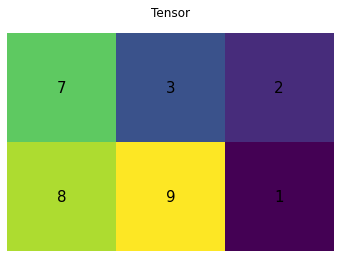

In [2]:
# 텐서 생성하기 기본
tensor = torch.Tensor([[7, 3, 2], [8, 9, 1]]) # 2차원 행렬
tensor_draw(tensor, "Tensor")

## 텐서(행렬)의 덧셈

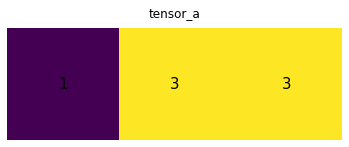

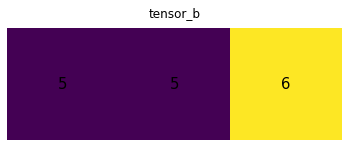

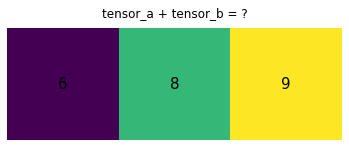

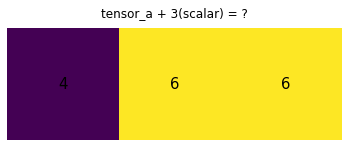

In [3]:
tensor_a = torch.randint(low=1, high=9, size=(1,3))
tensor_b = torch.randint(low=1, high=9, size=(1,3))
tensor_draw(tensor_a, "tensor_a")
tensor_draw(tensor_b, "tensor_b")
tensor_draw(torch.add(tensor_a, tensor_b), "tensor_a + tensor_b = ?")
tensor_draw(tensor_a + 3, "tensor_a + 3(scalar) = ?")

## 텐서(행렬)의 곱

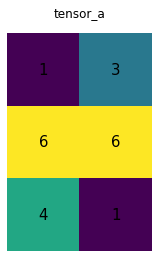

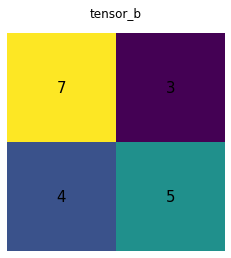

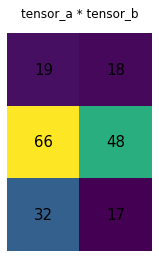

In [4]:
tensor_a = torch.randint(low=1, high=9, size=(3,2))
tensor_b = torch.randint(low=1, high=9, size=(2,2))

tensor_draw(tensor_a, "tensor_a")
tensor_draw(tensor_b, "tensor_b")
tensor_draw(tensor_a.mm(tensor_b), "tensor_a * tensor_b")

## 텐서(행렬)의 전치행렬(Transpose)

전체 전치행렬 수행 전


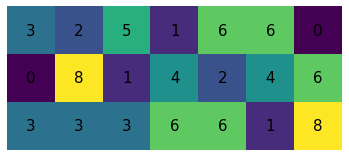

전체 전치행렬 수행 후


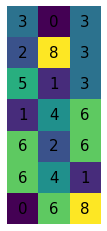

In [5]:
tensor_a = torch.randint(low=0, high=9, size=(3,7))
print("전체 전치행렬 수행 전")
tensor_draw(tensor_a)
print("전체 전치행렬 수행 후")
tensor_draw(tensor_a.t())

## 텐서(행렬)의 역행렬

In [6]:
def tensor_draw_float(ten, title=""):
    data = ten.numpy()
    if len(ten.size()) == 3:
        for a in range(len(data)):
            fig, ax = plt.subplots()
            for (b, c), z in np.ndenumerate(data[a]):
                ax.matshow(data[a])
                ax.text(c, b, '{:0.2f}'.format(z), ha='center', va='center', fontsize=15)
            plt.title(title)
            plt.axis("off")
            plt.show()   
    elif len(ten.size()) <= 2:
        if len(ten.size()) == 0:
            data = ten.int().unsqueeze(0).unsqueeze(0).numpy()
        elif len(ten.size()) == 1:
            data = ten.int().unsqueeze(0).numpy()
        fig, ax = plt.subplots()
        for (a, b), z in np.ndenumerate(data):
            ax.matshow(data)
            ax.text(b, a, '{:0.2f}'.format(z), ha='center', va='center', fontsize=15)
        plt.title(title)
        plt.axis("off")
        plt.show()

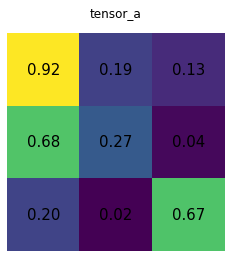

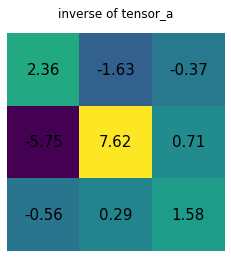

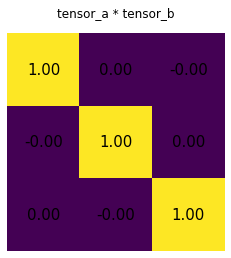

In [7]:
# 역행렬 구해보기

tensor_a = torch.rand((3, 3))
tensor_draw_float(tensor_a, "tensor_a")
tensor_a_inverse = torch.inverse(tensor_a)
tensor_draw_float(tensor_a_inverse, "inverse of tensor_a")
tensor_draw_float(tensor_a.mm(tensor_a_inverse), "tensor_a * tensor_b")

# 잠재의미분석: LSA (Latent Semantic Analysis)

In [8]:
# 저장소 클론
! git clone https://github.com/Seongtae-Kim/Math_LSA.git

fatal: destination path 'Math_LSA' already exists and is not an empty directory.


### 파일 불러오기 & 토큰화

In [9]:
import pickle
docs_with_names= pickle.load(open("/content/Math_LSA/docs_tokenized.pkl", "rb"))
names = [name for name, _ in docs_with_names]
docs = [doc for _ , doc in docs_with_names]

In [10]:
# 불러온 전처리 이후 토큰들
print(docs[0])

[('최인훈', 'NNP'), ('광장', 'NNG'), ('바다', 'NNG'), ('는', 'JX'), ('크레파스', 'NNG'), ('보다', 'JKB'), ('진한', 'VA+ETM'), ('푸르', 'VA'), ('고', 'EC'), ('육중', 'XR'), ('한', 'XSA+ETM'), ('비늘', 'NNG'), ('을', 'JKO'), ('무겁', 'VA'), ('게', 'EC'), ('뒤채', 'VV'), ('면서', 'EC'), (',', 'SC'), ('숨', 'NNG'), ('을', 'JKO'), ('쉰다', 'VV+EF'), ('.', 'SF'), ('중립국', 'NNG'), ('으로', 'JKB'), ('가', 'VV'), ('는', 'ETM'), ('석방', 'NNG'), ('포로', 'NNG'), ('를', 'JKO'), ('실은', 'MAG'), ('인도', 'NNP'), ('배', 'NNP'), ('타고르', 'NNP'), ('호', 'NNP'), ('는', 'JX'), (',', 'SC'), ('흰', 'VA+ETM'), ('페인트', 'NNG'), ('로', 'JKB'), ('말쑥', 'XR'), ('하', 'XSA'), ('게', 'EC'), ('칠', 'VX+EC+JKO'), ('한', 'MM'), ('삼', 'NR'), ('천', 'NR'), ('톤', 'NNBC'), ('의', 'JKG'), ('몸', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('면서', 'EC'), (',', 'SC'), ('물건', 'NNG'), ('처럼', 'JKB'), ('빼곡이', 'MAG'), ('들어찬', 'VV+ETM'), ('동지', 'NNG'), ('나', 'JC'), ('바다', 'NNG'), ('의', 'JKG'), ('훈김', 'NNG'), ('을', 'JKO'), ('헤치', 'VV'), ('며', 'EC'), ('미', 'NNG'), ('끄', 'VV'), ('려', 'EC'), ('져', 'VX+EC

In [11]:
# 단어장 생성 함수
def make_word_dict(doc, pos=["NNP", "NNG"]): # "ALL" to extract all pos
    dic={}
    for token in doc:
        if pos == "ALL":
            if token not in dic.keys():
                dic[token]=1
            else:
                dic[token]+=1
        else:
            if token[1] in pos:
                if token not in dic.keys():
                    dic[token]=1
                else:
                    dic[token]+=1
        
    return {k:v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

In [12]:
# 모든 문서에서 단어장 생성
tokens=[]
for doc in docs:
    tokens.extend(doc)
dic = make_word_dict(tokens)

In [13]:
# 단어장 확인! (전체 빈도는 lsa에서 사용하지 않는다. - 참고용)
dic

{('때', 'NNG'): 176,
 ('사람', 'NNG'): 167,
 ('일', 'NNG'): 164,
 ('말', 'NNG'): 160,
 ('조선', 'NNP'): 158,
 ('뒤', 'NNG'): 110,
 ('군', 'NNG'): 104,
 ('고려', 'NNG'): 96,
 ('일본', 'NNP'): 93,
 ('집', 'NNG'): 88,
 ('시작', 'NNG'): 87,
 ('생각', 'NNG'): 83,
 ('소리', 'NNG'): 81,
 ('전', 'NNG'): 79,
 ('전쟁', 'NNG'): 79,
 ('속', 'NNG'): 78,
 ('서비스', 'NNG'): 76,
 ('전투', 'NNG'): 74,
 ('어머니', 'NNG'): 68,
 ('홍건적', 'NNG'): 65,
 ('눈', 'NNG'): 64,
 ('이후', 'NNG'): 63,
 ('후', 'NNG'): 62,
 ('얼굴', 'NNG'): 61,
 ('손', 'NNG'): 60,
 ('애플', 'NNP'): 60,
 ('당시', 'NNG'): 57,
 ('보안', 'NNG'): 55,
 ('공격', 'NNG'): 54,
 ('아내', 'NNG'): 53,
 ('사건', 'NNG'): 52,
 ('길', 'NNG'): 51,
 ('점', 'NNG'): 49,
 ('사단', 'NNG'): 49,
 ('고구려', 'NNG'): 49,
 ('신라', 'NNP'): 49,
 ('방', 'NNG'): 48,
 ('노인', 'NNG'): 48,
 ('미국', 'NNP'): 48,
 ('위', 'NNG'): 47,
 ('날', 'NNG'): 47,
 ('기술', 'NNG'): 46,
 ('소녀', 'NNG'): 44,
 ('서울', 'NNP'): 43,
 ('앞', 'NNG'): 43,
 ('배', 'NNG'): 42,
 ('나라', 'NNG'): 42,
 ('이상', 'NNG'): 42,
 ('이번', 'NNG'): 41,
 ('영감', 'NNG'): 41,
 ('밤', 

In [14]:
# Document-Term Frequency 행렬 생성 함수
def extract_word_indicies(docs, dic): # base on DTM
    import numpy as np
    vectors=[]
    for doc in docs:
        vector = [0]*len(dic)
        for i, word in enumerate(dic):
            for token in doc:
                if word == token:
                    vector[i]+=1
        vectors.append(vector)
    return np.array(vectors)

In [15]:
# 모든 문서를 이용하여 행렬 생성
A = extract_word_indicies(docs, dic)

In [16]:
# 문서의 개수 x 모든 문서에서 등장하는 단어의 개수
print(A)
print(A.shape)

[[11  6 12 ...  0  0  0]
 [ 0  4  7 ...  0  0  0]
 [ 9  5 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 2  0  0 ...  1  1  1]]
(60, 7634)


### 특이값 분해(Singular Vector Decomposition)

In [17]:
# numpy 패키지에서 제공하는 SVD 함수 이용 => Full SVD 수행
import numpy as np
U, s, VT = np.linalg.svd(A, full_matrices=True)

In [18]:
# 직교행렬 U의 크기는 문서의 개수 x 문서의 개수
#print(U.round(2))
print(np.shape(U))

(60, 60)


In [19]:
# *****************************************************************
# s는 특이값의 리스트 (numpy가 제공하는 함수 특성상) => 대각행렬로 변환 필요
# 내림차순으로 정렬된 것을 볼 수 있음 (정보량, topic strength)
print(s.round(2))
print(np.shape(s))
# *****************************************************************

[116.7  100.85  87.41  80.02  74.02  72.3   68.17  66.13  61.24  58.89
  58.87  57.76  57.44  56.58  55.85  55.11  54.07  54.    51.8   49.89
  48.95  47.43  45.83  44.55  43.79  42.16  41.51  39.83  39.55  38.72
  37.73  37.58  37.35  37.12  36.98  35.57  35.41  34.9   34.34  34.25
  33.87  32.79  32.36  32.1   31.55  30.94  30.53  29.2   28.82  28.45
  28.08  26.37  25.44  24.71  24.37  23.94  22.56  22.41  21.3   20.44]
(60,)


In [20]:
# 대각행렬로 변환
S = np.zeros(A.shape)
d = A.shape[0]
S[:d, :d] = np.diag(s)
print(S.round(2))
np.shape(S)

[[116.7    0.     0.   ...   0.     0.     0.  ]
 [  0.   100.85   0.   ...   0.     0.     0.  ]
 [  0.     0.    87.41 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


(60, 7634)

In [21]:
# V의 전치행렬인 VT
print(VT.round(2)) # 각 단어 벡터의 잠재 의미
print(np.shape(VT))

[[ 0.15  0.13  0.13 ...  0.    0.    0.  ]
 [-0.21 -0.24 -0.24 ... -0.   -0.   -0.  ]
 [ 0.08  0.11  0.13 ... -0.   -0.   -0.  ]
 ...
 [-0.    0.   -0.   ...  1.   -0.   -0.  ]
 [-0.    0.   -0.   ... -0.    1.   -0.  ]
 [-0.    0.   -0.   ... -0.   -0.    1.  ]]
(7634, 7634)


In [22]:
# U x S x VT를 했을 경우 다시 기존의 행렬 A가 나오는가?
confirmation = np.allclose(A, np.dot(np.dot(U, S), VT).round(2))
print(confirmation)
print()
print(A)
print(np.dot(np.dot(U, S), VT).round(2))

True

[[11  6 12 ...  0  0  0]
 [ 0  4  7 ...  0  0  0]
 [ 9  5 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 2  0  0 ...  1  1  1]]
[[11.  6. 12. ...  0.  0.  0.]
 [-0.  4.  7. ... -0. -0. -0.]
 [ 9.  5. 18. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 1. -0. -0. ...  0.  0.  0.]
 [ 2.  0.  0. ...  1.  1.  1.]]


### SVD Truncation

In [23]:
# t 값을 크게 잡을 수록 노이즈가 생기지만 풍부한 의미를
# 작게 잡을 수록 정확한 결과를 제공한다.
t = 3

In [24]:
# 본래 S 행렬에서 상위 t개만 추출
S_prime = S[:t, :t]
print("{} -> {}".format(np.shape(S),np.shape(S_prime)))
print()
print(S_prime.round(2))

(60, 7634) -> (3, 3)

[[116.7    0.     0.  ]
 [  0.   100.85   0.  ]
 [  0.     0.    87.41]]


In [25]:
# 본래 U 행렬에서 상위 t개만 추출
U_prime = U[:, :t]
print("{} -> {}".format(np.shape(U),np.shape(U_prime)))
print()
print(U_prime.round(2)) 

(60, 60) -> (60, 3)

[[ 0.09 -0.17  0.1 ]
 [ 0.06 -0.1   0.04]
 [ 0.12 -0.24  0.17]
 [ 0.04 -0.08  0.05]
 [ 0.08 -0.17  0.12]
 [ 0.12 -0.18  0.07]
 [ 0.11 -0.2   0.1 ]
 [ 0.09 -0.17  0.11]
 [ 0.03 -0.05  0.02]
 [ 0.05 -0.09  0.04]
 [ 0.09 -0.17  0.11]
 [ 0.06 -0.12  0.09]
 [ 0.05 -0.1   0.06]
 [ 0.1  -0.2   0.15]
 [ 0.08 -0.18  0.14]
 [ 0.05 -0.1   0.07]
 [ 0.07 -0.15  0.11]
 [ 0.13 -0.3   0.29]
 [ 0.06 -0.13  0.08]
 [ 0.06 -0.12  0.08]
 [ 0.12 -0.11 -0.06]
 [ 0.19  0.01  0.  ]
 [ 0.21 -0.06 -0.33]
 [ 0.11 -0.02 -0.13]
 [ 0.12 -0.04 -0.14]
 [ 0.15  0.01 -0.16]
 [ 0.07 -0.01  0.01]
 [ 0.09 -0.06 -0.11]
 [ 0.24 -0.09 -0.35]
 [ 0.14 -0.09 -0.15]
 [ 0.08 -0.01 -0.09]
 [ 0.1  -0.07 -0.1 ]
 [ 0.19 -0.12 -0.2 ]
 [ 0.11  0.07  0.03]
 [ 0.15 -0.18  0.  ]
 [ 0.67  0.61  0.37]
 [ 0.25 -0.05 -0.41]
 [ 0.03 -0.04  0.01]
 [ 0.06 -0.04 -0.02]
 [ 0.15  0.01 -0.16]
 [ 0.02 -0.01  0.  ]
 [ 0.04 -0.04 -0.04]
 [ 0.01 -0.01 -0.  ]
 [ 0.05 -0.03 -0.02]
 [ 0.02 -0.01 -0.  ]
 [ 0.04 -0.02 -0.01]
 [ 0.03 -0.03

In [26]:
# 본래 VT 행렬에서 상위 t개만 추출
VT_prime = VT[:t,:]
print("{} -> {}".format(np.shape(VT),np.shape(VT_prime)))
print()
print(VT_prime.round(2))

(7634, 7634) -> (3, 7634)

[[ 0.15  0.13  0.13 ...  0.    0.    0.  ]
 [-0.21 -0.24 -0.24 ... -0.   -0.   -0.  ]
 [ 0.08  0.11  0.13 ... -0.   -0.   -0.  ]]


In [27]:
# 문서 U와 정보량 벡터인 S를 연산할 경우 각 문서가 상위 t개의 잠재 의미 분류에서 어떠한 위치를 가지는지 알 수 있다.
US = np.dot(U_prime, S_prime)
print(np.shape(US))

(60, 3)


In [28]:
# 우리는 t개의 잠재의미가 있다고 가정했다. 각 문서들의 잠재의미에 대한 위치는 다음과 같다.
import pandas as pd
tp_srs = pd.DataFrame(index=names)
for i, row in enumerate(US.round(2)):
    for j, item in enumerate(row):
        tp_srs.loc[names[i], j] = round(item, 2)
tp_srs

,0,1,2
novel_12.txt,10.13,-17.11,8.43
novel_11.txt,7.56,-10.16,3.78
novel_6.txt,13.55,-23.93,14.83
novel_16.txt,4.74,-8.04,4.64
novel_14.txt,9.21,-16.79,10.54
novel_7.txt,14.08,-18.28,6.49
novel_2.txt,13.22,-20.16,8.99
novel_1..txt,10.19,-17.28,9.37
novel_8.txt,3.88,-4.71,1.65
novel_9.txt,5.88,-9.00,3.81


In [29]:
# tuncation의 결과로 생겨난 파생 행렬인 A_prime은 행렬 A와 크기는 같지만 기존의 행렬 S, VT, U가 잘려나갔기 때문에 이제는 다시 모두 곱한다고 원상태로 복귀되지 않는다.
A_prime=np.dot(US, VT_prime)
print(A)
print(A_prime.round(2))
print("{} -> {}".format(np.shape(A),np.shape(A_prime)))

[[11  6 12 ...  0  0  0]
 [ 0  4  7 ...  0  0  0]
 [ 9  5 18 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 2  0  0 ...  1  1  1]]
[[5.74 6.33 6.54 ... 0.   0.   0.  ]
 [3.55 3.82 3.91 ... 0.   0.   0.  ]
 [8.16 9.11 9.47 ... 0.   0.   0.  ]
 ...
 [0.49 0.46 0.43 ... 0.   0.   0.  ]
 [0.44 0.41 0.4  ... 0.   0.   0.  ]
 [0.42 0.42 0.42 ... 0.   0.   0.  ]]
(60, 7634) -> (60, 7634)


## 문서 토픽 모델링 시각화

In [30]:
# 보기 쉽게 시각화를 해보자
x_data_1 = list(tp_srs[0])[:20]
x_data_2 = list(tp_srs[0])[21:40]
x_data_3 = list(tp_srs[0])[41:]

y_data_1 = list(tp_srs[1])[:20]
y_data_2 = list(tp_srs[1])[21:40]
y_data_3 = list(tp_srs[1])[41:]

z_data_1 = list(tp_srs[2])[:20]
z_data_2 = list(tp_srs[2])[21:40]
z_data_3 = list(tp_srs[2])[41:]

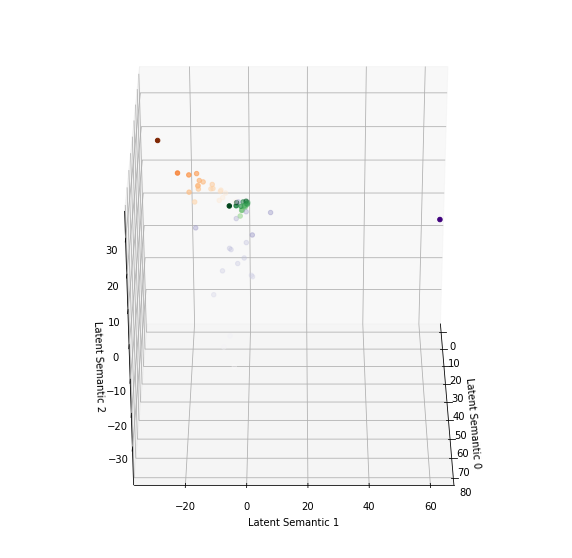

In [31]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
import numpy as np

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

zline = np.linspace(0, 5, 100)
xline = np.sin(zline)
yline = np.cos(zline)

ax.scatter3D(x_data_1, y_data_1, z_data_1, c=z_data_1, cmap="Oranges") # 한국 현대 단편 소설
ax.scatter3D(x_data_2, y_data_2, z_data_2, c=z_data_2, cmap="Purples") # 한국 위키피디아 역사 관련 문서
ax.scatter3D(x_data_3, y_data_3, z_data_3, c=z_data_3, cmap="Greens") # 네이버 IT 관련 뉴스

ax.set_xlabel("Latent Semantic 0")
ax.set_ylabel("Latent Semantic 1")
ax.set_zlabel("Latent Semantic 2")

def animate(frame):
  ax.view_init(30, frame/2)
  plt.pause(.001)
  return fig
anim = animation.FuncAnimation(fig, animate, frames=300, interval=50)
HTML(anim.to_html5_video())

In [32]:
# t 값을 크게 잡을 수록 노이즈가 생기지만 풍부한 의미를
# 작게 잡을 수록 정확한 결과를 제공한다.
t = 2

U_prime = U[:, :t]
S_prime = S[:t, :t]
VT_prime = VT[:t,:]

# 단어 VT와 정보량 벡터인 S를 연산할 경우 각 단어가 상위 t개의 잠재 의미 분류에서 어떠한 위치를 가지는지 알 수 있다.
SVT = np.dot(S_prime, VT_prime)
print(np.shape(SVT))

(2, 7634)


## 단어 토픽 모델링 시각화

In [35]:
# 한글 폰트 문제 처리
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import re

path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
f_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc("font", family=f_name)
fm._rebuild()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


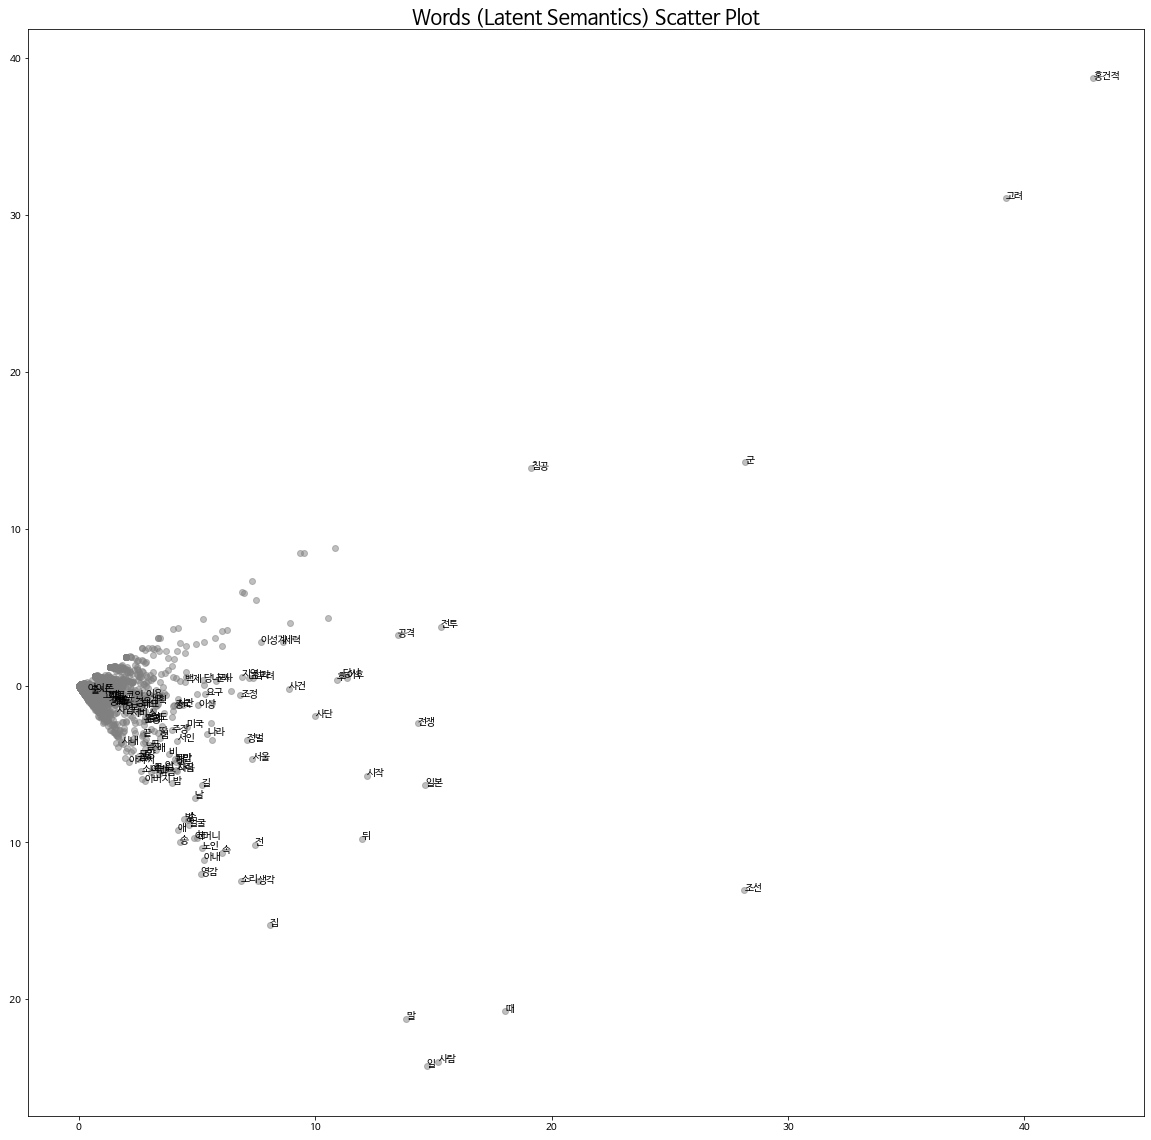

In [44]:
p="[가-힣\u2e80-\u2eff\u31c0-\u31ef\u3200-\u32ff\u3400-\u4dbf\u4e00-\u9fbf\uf900-\ufaff]+"
words = [re.search(p, repr(w)).group() for w in list(dic.keys())]

plt.figure(figsize=(20,20))
plt.title("Words (Latent Semantics) Scatter Plot", fontsize=20)
plt.scatter(SVT[0], SVT[1], color="grey", alpha=0.5)

for i, l in enumerate(words[:100]): # 단어 100개만 표시
  plt.annotate(l, (SVT[0][i], SVT[1][i]))
plt.show()